In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score

from keras.models import load_model

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('D:/Papers/paper_code/new/Data/Processed/Climate_data.csv')
data.head()

,date,meantemp,humidity,wind_speed,meanpressure,Year,Month,Day,Weekday
0,2013-01-01,0.122271,0.840372,0.000000,0.132603,0.0,0.0,0.000000,0.166667
1,2013-01-02,0.042795,0.929054,0.070583,0.132881,0.0,0.0,0.033333,0.333333
2,2013-01-03,0.035662,0.869932,0.109743,0.132994,0.0,0.0,0.066667,0.500000
3,2013-01-04,0.081514,0.684685,0.029212,0.132799,0.0,0.0,0.100000,0.666667
4,2013-01-05,0.000000,0.867962,0.087636,0.132712,0.0,0.0,0.133333,0.833333


In [3]:
train = data[:-180]
test = data[-180:]
print(train.shape)
print(test.shape)

(1395, 9)
(180, 9)


In [4]:
x_train = train.drop(columns = {'date','meantemp'}, axis = 1)
y_train = train.loc[:, ['meantemp']]

x_test = test.drop(columns = {'date','meantemp'}, axis = 1)
y_test = test.loc[:, ['meantemp']]

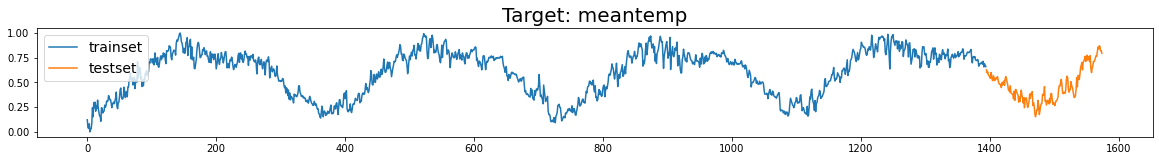

In [5]:
sns.reset_orig()
plt.figure(figsize = (20,2))
plt.title('Target: meantemp', fontsize = 20)
plt.plot(y_train['meantemp'], label = 'trainset')
plt.plot(y_test['meantemp'], label = 'testset')

plt.legend(fontsize = 14)
plt.show()

In [6]:
x_test_sca = x_test.values[:].reshape(x_test.shape[0], 1, x_test.shape[1])

In [7]:
model_gru = load_model('D:/Papers/paper_code/new/Model/Daily_Climate/model_gru.h5')

In [8]:
model_gru_impro = load_model('D:/Papers/paper_code/new/Model/Daily_Climate/model_(gru).h5')

In [9]:
prediction_gru = model_gru.predict(x_test_sca)
r2 = r2_score(prediction_gru, y_test)
mse = mean_squared_error(prediction_gru, y_test)
print(r2)
print(mse)

6/6 [==============================] - 1s 1ms/step
0.6719010913023766
0.011761116453606996


In [10]:
pred_impro = model_gru_impro.predict(x_test_sca)
r2_impro = r2_score(pred_impro, y_test)
mse_impro = mean_squared_error(pred_impro, y_test)

print(r2_impro, 'Degree of Improvement: {:.2%}'.format((r2_impro-r2)/abs(r2)))
print(mse_impro, 'Degree of Improvement: {:.2%}'.format((mse-mse_impro)/mse))

6/6 [==============================] - 0s 1ms/step
0.7470031517204349 Degree of Improvement: 11.18%
0.009200394883230212 Degree of Improvement: 21.77%


In [11]:
prediction = pd.DataFrame(prediction_gru, index=y_test.index)
pred_our = pd.DataFrame(pred_impro, index=y_test.index)

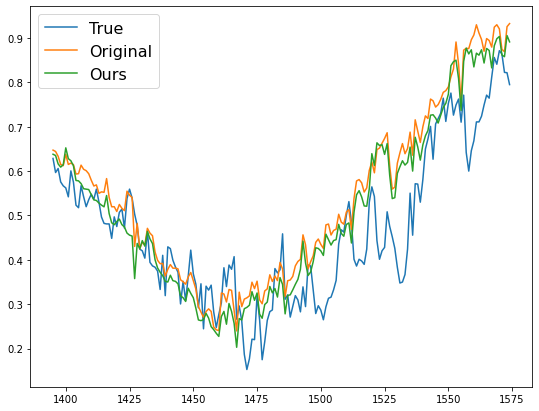

In [12]:
sns.reset_orig()
plt.figure(figsize = (9,7))

plt.plot(y_test['meantemp'], label = 'True')
plt.plot(prediction, label = 'Original')
plt.plot(pred_our, label = 'Ours')

plt.legend(fontsize = 16)
plt.show()

In [2]:
data = pd.read_csv('D:/Papers/paper_code/new/Data/Processed/Energy_data.csv')
train = data[:-300]
test = data[-300:]

x_train = train.drop(columns = {'Timestamp','Value'}, axis = 1)
y_train = train.loc[:, ['Value']]

x_test = test.drop(columns = {'Timestamp','Value'}, axis = 1)
y_test = test.loc[:, ['Value']]

In [3]:
x_train_sca = x_train.values[:].reshape(x_train.shape[0], 1, x_train.shape[1])
x_test_sca = x_test.values[:].reshape(x_test.shape[0], 1, x_test.shape[1])

In [4]:
model = load_model('D:/Papers/paper_code/new/Model/Energy_Consumption/model_rnn.h5')
model_impro = load_model('D:/Papers/paper_code/new/Model/Energy_Consumption/model_(rnn).h5')

In [5]:
prediction = model.predict(x_test_sca)
prediction = prediction.reshape(300, 1)

r2 = r2_score(prediction, y_test)
mse = mean_squared_error(prediction, y_test)
print(r2)
print(mse)

10/10 [==============================] - 0s 886us/step
0.6574887755946385
0.012831229425228656


In [6]:
pred_impro = model_impro.predict(x_test_sca)
pred_impro = pred_impro.reshape(300, 1)

r2_impro = r2_score(pred_impro, y_test)
mse_impro = mean_squared_error(pred_impro, y_test)

print(r2_impro, 'Degree of Improvement: {:.2%}'.format((r2_impro-r2)/abs(r2)))
print(mse_impro, 'Degree of Improvement: {:.2%}'.format((mse-mse_impro)/mse))

10/10 [==============================] - 0s 886us/step
0.7572391937472682 Degree of Improvement: 15.17%
0.01162063947654311 Degree of Improvement: 9.43%


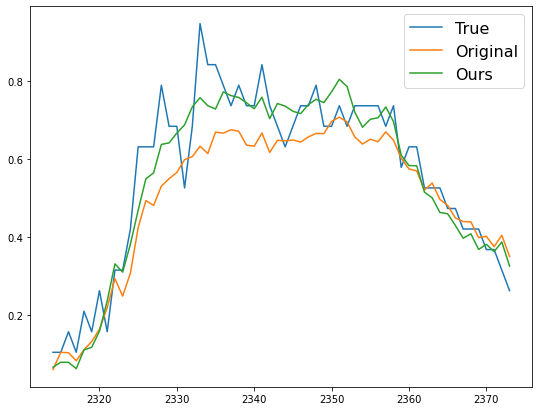

In [8]:
prediction = pd.DataFrame(prediction, index=y_test.index)
pred_our = pd.DataFrame(pred_impro, index=y_test.index)

sns.reset_orig()
plt.figure(figsize = (9,7))
#plt.title('Energy Consumption', fontsize = 24)
plt.plot(y_test['Value'][210:270], label = 'True')
plt.plot(prediction[210:270], label = 'Original')
plt.plot(pred_our[210:270], label = 'Ours')

plt.legend(fontsize = 16)
plt.show()

In [2]:
data = pd.read_csv('D:/Papers/paper_code/new/Data/Processed/Gold_data.csv')
train = data[:-365]
test = data[-365:]

x_train =  train.drop(columns = {'Date', 'Price'}, axis = 1)
y_train = train.loc[:, ['Price']]

x_test = test.drop(columns = {'Date', 'Price'}, axis = 1)
y_test = test.loc[:, ['Price']]

x_train_sca = x_train.values[:].reshape(x_train.shape[0], 1, x_train.shape[1])
x_test_sca = x_test.values[:].reshape(x_test.shape[0], 1, x_test.shape[1])

In [3]:
model = load_model('D:/Papers/paper_code/new/Model/Gold_Price/model_birnn.h5')
model_impro = load_model('D:/Papers/paper_code/new/Model/Gold_Price/model_(birnn).h5')

In [4]:
prediction = model.predict(x_test_sca)
prediction = prediction.reshape(365, 1)

r2 = r2_score(prediction, y_test)
mse = mean_squared_error(prediction, y_test)
print(r2)
print(mse)

12/12 [==============================] - 0s 906us/step
0.8048885151769302
0.0008756773074272818


In [5]:
pred_impro = model_impro.predict(x_test_sca)
pred_impro = pred_impro.reshape(365, 1)

r2_impro = r2_score(pred_impro, y_test)
mse_impro = mean_squared_error(pred_impro, y_test)

print(r2_impro, 'Degree of Improvement: {:.2%}'.format((r2_impro-r2)/abs(r2)))
print(mse_impro, 'Degree of Improvement: {:.2%}'.format((mse-mse_impro)/mse))

12/12 [==============================] - 0s 816us/step
0.8980018116641422 Degree of Improvement: 11.57%
0.0004500920609183597 Degree of Improvement: 48.60%


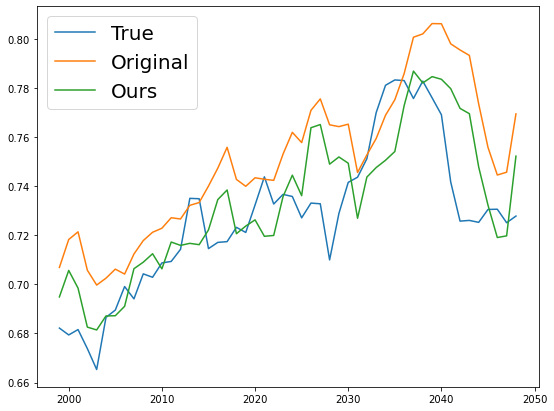

In [6]:
prediction = pd.DataFrame(prediction, index=y_test.index)
pred_our = pd.DataFrame(pred_impro, index=y_test.index)

sns.reset_orig()
plt.figure(figsize = (9,7))

#plt.title('Gold Price', fontsize = 24)
plt.plot(y_test['Price'][140:190], label = 'True')
plt.plot(prediction[140:190], label = 'Original')
plt.plot(pred_our[140:190], label = 'Ours')

plt.legend(fontsize = 20)
plt.show()

In [7]:
data = pd.read_csv('D:/Papers/paper_code/new/Data/Processed/Solar_data.csv')
train = data[:-192]
test = data[-192:]

x_train = train.drop(columns = {'DATE_TIME','DAILY_YIELD'}, axis = 1)
y_train = train.loc[:, ['DAILY_YIELD']]

x_test = test.drop(columns = {'DATE_TIME','DAILY_YIELD'}, axis = 1)
y_test = test.loc[:, ['DAILY_YIELD']]

x_train_sca = x_train.values[:].reshape(x_train.shape[0], 1, x_train.shape[1])
x_test_sca = x_test.values[:].reshape(x_test.shape[0], 1, x_test.shape[1])

In [8]:
model = load_model('D:/Papers/paper_code/new/Model/Solar_Power/model_bigru.h5')
model_impro = load_model('D:/Papers/paper_code/new/Model/Solar_Power/model_(bigru).h5')

In [9]:
prediction = model.predict(x_test_sca)
prediction = prediction.reshape(192, 1)

r2 = r2_score(prediction, y_test)
mse = mean_squared_error(prediction, y_test)
print(r2)
print(mse)

6/6 [==============================] - 0s 1ms/step
0.9481219938335195
0.005657595124010765


In [10]:
pred_impro = model_impro.predict(x_test_sca)
pred_impro = pred_impro.reshape(192, 1)

r2_impro = r2_score(pred_impro, y_test)
mse_impro = mean_squared_error(pred_impro, y_test)

print(r2_impro, 'Degree of Improvement: {:.2%}'.format((r2_impro-r2)/abs(r2)))
print(mse_impro, 'Degree of Improvement: {:.2%}'.format((mse-mse_impro)/mse))

6/6 [==============================] - 0s 1ms/step
0.984016986840869 Degree of Improvement: 3.79%
0.0014780944640385059 Degree of Improvement: 73.87%


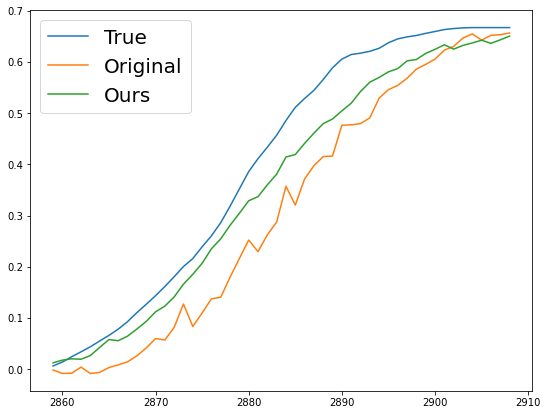

In [11]:
prediction = pd.DataFrame(prediction, index=y_test.index)
pred_our = pd.DataFrame(pred_impro, index=y_test.index)

sns.reset_orig()
plt.figure(figsize = (9,7))
#plt.title('Solar Power', fontsize = 24)
plt.plot(y_test['DAILY_YIELD'][125:175], label = 'True')
plt.plot(prediction[125:175], label = 'Original')
plt.plot(pred_our[125:175], label = 'Ours')

plt.legend(fontsize = 20)
plt.show()

In [12]:
data = pd.read_csv('D:/Papers/paper_code/new/Data/Processed/Tesla_data.csv')
train = data[:-92]
test = data[-92:]

x_train = train.drop(columns = {'Date','Close'}, axis = 1)
y_train = train.loc[:, ['Close']]

x_test = test.drop(columns = {'Date','Close'}, axis = 1)
y_test = test.loc[:, ['Close']]

x_train_sca = x_train.values[:].reshape(x_train.shape[0], 1, x_train.shape[1])
x_test_sca = x_test.values[:].reshape(x_test.shape[0], 1, x_test.shape[1])

In [13]:
model = load_model('D:/Papers/paper_code/new/Model/Tesla_Stock/model_birnn.h5')
model_impro = load_model('D:/Papers/paper_code/new/Model/Tesla_Stock/model_(birnn).h5')

In [14]:
prediction = model.predict(x_test_sca)
prediction = prediction.reshape(92, 1)

r2 = r2_score(prediction, y_test)
mse = mean_squared_error(prediction, y_test)
print(r2)
print(mse)

3/3 [==============================] - 0s 997us/step
0.7990067756610788
0.0029614454305278994


In [15]:
pred_impro = model_impro.predict(x_test_sca)
pred_impro = pred_impro.reshape(92, 1)

r2_impro = r2_score(pred_impro, y_test)
mse_impro = mean_squared_error(pred_impro, y_test)

print(r2_impro, 'Degree of Improvement: {:.2%}'.format((r2_impro-r2)/abs(r2)))
print(mse_impro, 'Degree of Improvement: {:.2%}'.format((mse-mse_impro)/mse))

3/3 [==============================] - 0s 1ms/step
0.8932810505140673 Degree of Improvement: 11.80%
0.0016811280140213499 Degree of Improvement: 43.23%


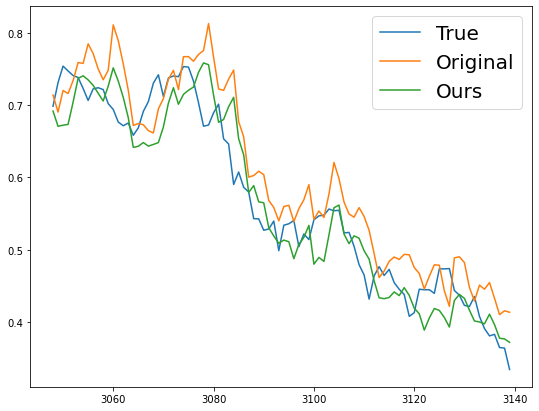

In [16]:
prediction = pd.DataFrame(prediction, index=y_test.index)
pred_our = pd.DataFrame(pred_impro, index=y_test.index)

sns.reset_orig()
plt.figure(figsize = (9,7))
#plt.title('Tesla Stock ', fontsize = 24)
plt.plot(y_test['Close'], label = 'True')
plt.plot(prediction, label = 'Original')
plt.plot(pred_our, label = 'Ours')

plt.legend(fontsize = 20)
plt.show()